# Obesity Levels Research Project
## AAI 500 - Fall 2024

### Researchers

    Bosky Atani
    Dean P. Simmer

In [61]:
import pandas as pd

# load the data file
obesity_file_path = "data/ObesityDataSet_raw_and_data_sinthetic.csv"
obesity = pd.read_csv(obesity_file_path , sep=",")
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [62]:
obesity = obesity.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transportion"})

In [63]:
# add BMI to dataset
obesity['BMI'] = obesity['Weight'] / (obesity['Height'] ** 2)

In [64]:

obesity.describe().round(2)

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily,BMI
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66,29.70
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61,8.01
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00,13.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00,24.33
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63,28.72
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00,36.02
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00,50.81


Sample size is 2111

Age Distribution is right skewed

Mean age is 24.21 and median at 22.78.

The population dataset is mostly younger individuals

Mean weight is 86.59kg, std of 27.19.

In [65]:
# Check for any null values in the DataFrame
print(obesity.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_calorie_food_eat             0
vegetable_eat_daily               0
number_of_meals_daily             0
food_between_meals                0
SMOKE                             0
water_drinking_daily              0
calories_monitoring               0
physical_activity_daily           0
electronics_usage_daily           0
alcohol_drinking_frequency        0
method_of_transportion            0
NObeyesdad                        0
BMI                               0
dtype: int64


In [66]:
# Check for duplicate rows
duplicates = obesity.duplicated()

# Show how many duplicate rows are there
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows (if any)
duplicate_rows = obesity[duplicates]
print(duplicate_rows)

Number of duplicate rows: 24
     Gender   Age  Height  Weight family_history_with_overweight high_calorie_food_eat  vegetable_eat_daily  number_of_meals_daily food_between_meals SMOKE  water_drinking_daily calories_monitoring  physical_activity_daily  electronics_usage_daily alcohol_drinking_frequency method_of_transportion           NObeyesdad        BMI
98   Female  21.0    1.52    42.0                             no                    no                  3.0                    1.0         Frequently    no                   1.0                  no                      0.0                      0.0                  Sometimes  Public_Transportation  Insufficient_Weight  18.178670
106  Female  25.0    1.57    55.0                             no                   yes                  2.0                    1.0          Sometimes    no                   2.0                  no                      2.0                      0.0                  Sometimes  Public_Transportation        Normal

In [67]:
# not many duplicates, drop them
# Alternatively, drop duplicates in place
obesity.drop_duplicates(inplace=True)

In [68]:
# Create a dictionary with obesity categories and corresponding ranges to understand how NObesity is computed
obesity_data = {
    'Category': ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'BMI Range': ['Less than 18.5', '18.5 to 24.9', '25.0 to 29.9', '30.0 to 34.9', '35.0 to 39.9', 'Higher than 40']
}

# Convert dictionary to DataFrame
obesity_table = pd.DataFrame(obesity_data)

# Display the table
print(obesity_table)

      Category       BMI Range
0  Underweight  Less than 18.5
1       Normal    18.5 to 24.9
2   Overweight    25.0 to 29.9
3    Obesity I    30.0 to 34.9
4   Obesity II    35.0 to 39.9
5  Obesity III  Higher than 40


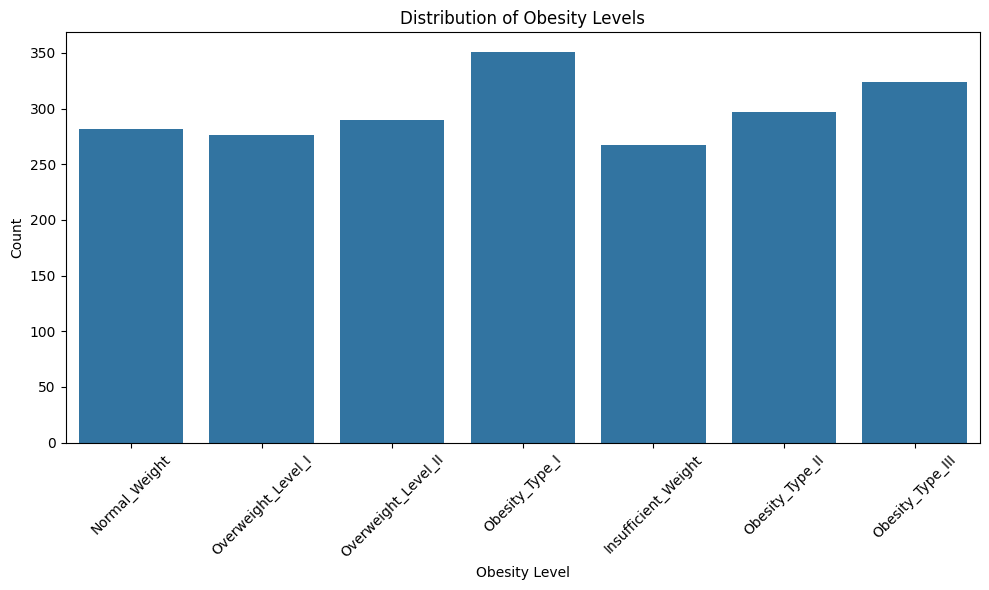

In [69]:
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Balanced distribution of obesity level. (Important to validate: Since there is signifcant part of the dataset that is synthetic)

### Univariate Analysis

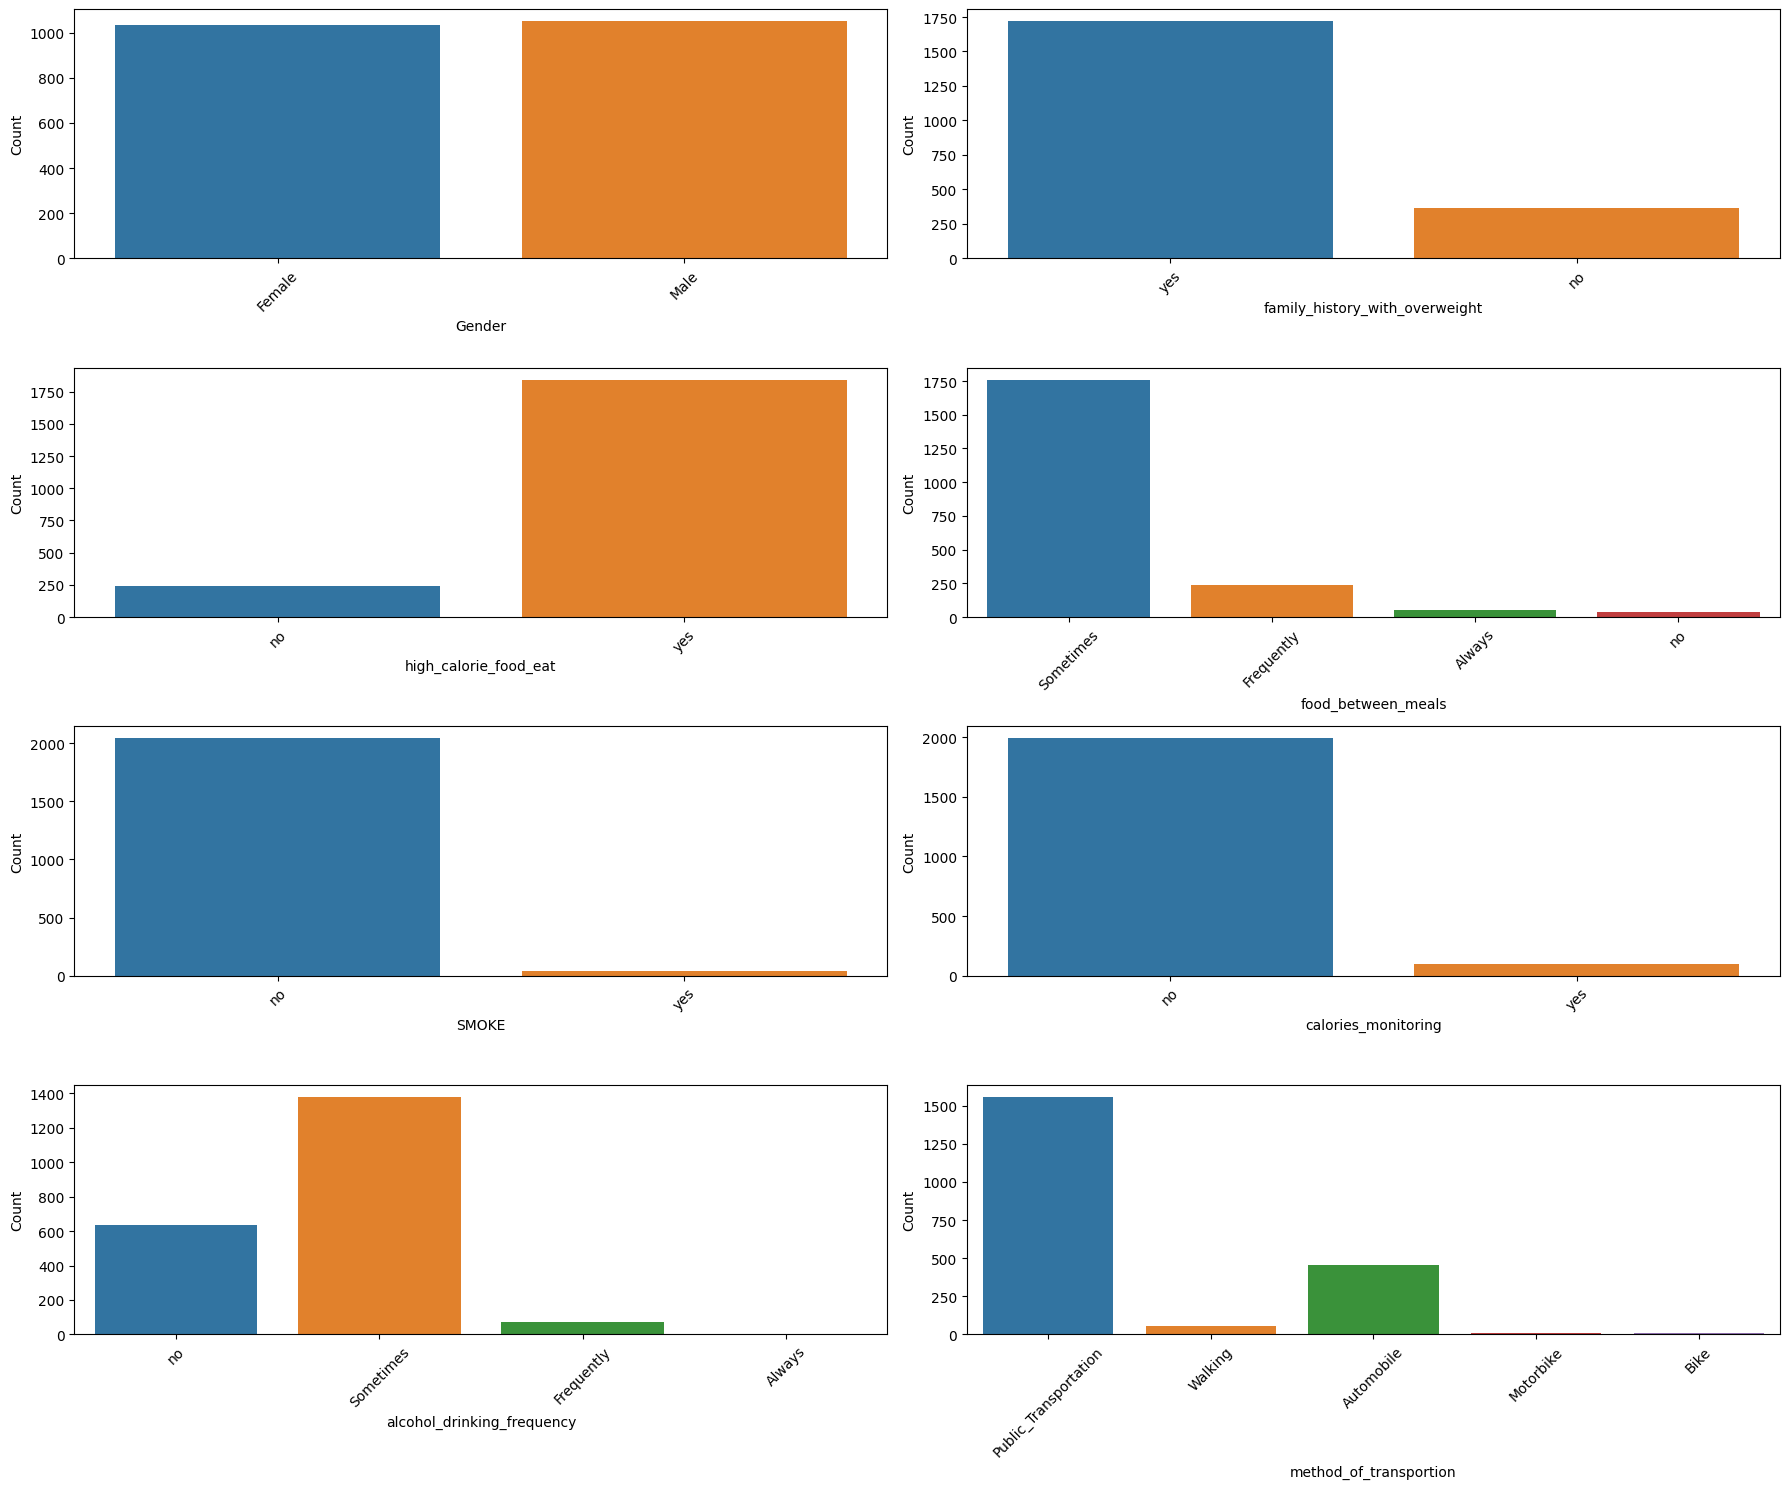

In [70]:
# Set the size of the figure
plt.figure(figsize=(18, 15))

# Loop through categorical columns (excluding the last one)
for i, col in enumerate(obesity.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4, 2, i + 1)  # Create a subplot
    sns.countplot(data=obesity, x=col, hue=col, legend=False)  # Set hue to the same column    plt.title(f'Count of {col}')  # Add title for each subplot
    plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Gender: Data shows equal distribution of male vs female
Alcohol Drinking frequency: Higher number of people drinking sometimes
Calorie counting: Mostly no
Smoke: Mostly non smokers
food between meals: many in sometimes category
high calorie food eat: a high frequency of yes
family history with overweight: high frequency of yes
Method of transportation: Very high use of public transportation


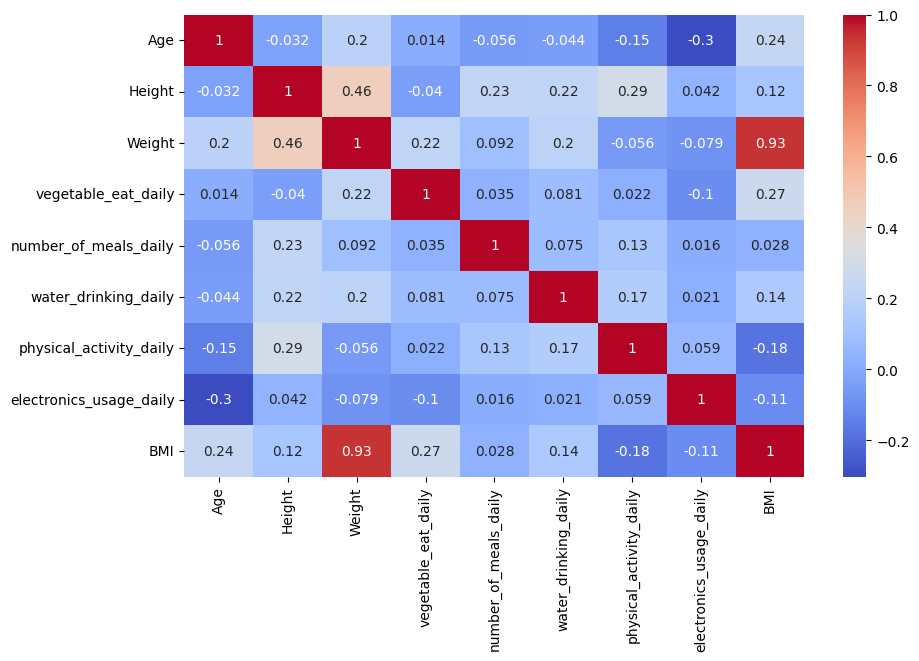

In [71]:
# explore any relationships between numeric types
# Select only the numeric columns from the dataset
numeric_data = obesity.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


Most corelation coffecients are small - indicating most variables are indepenant. This is important because it indicates no Multicollinearity. Possible makes it easier to identify effect on target variable Obesity Levels. 


#### Understanding distributions and outliers for numerical features

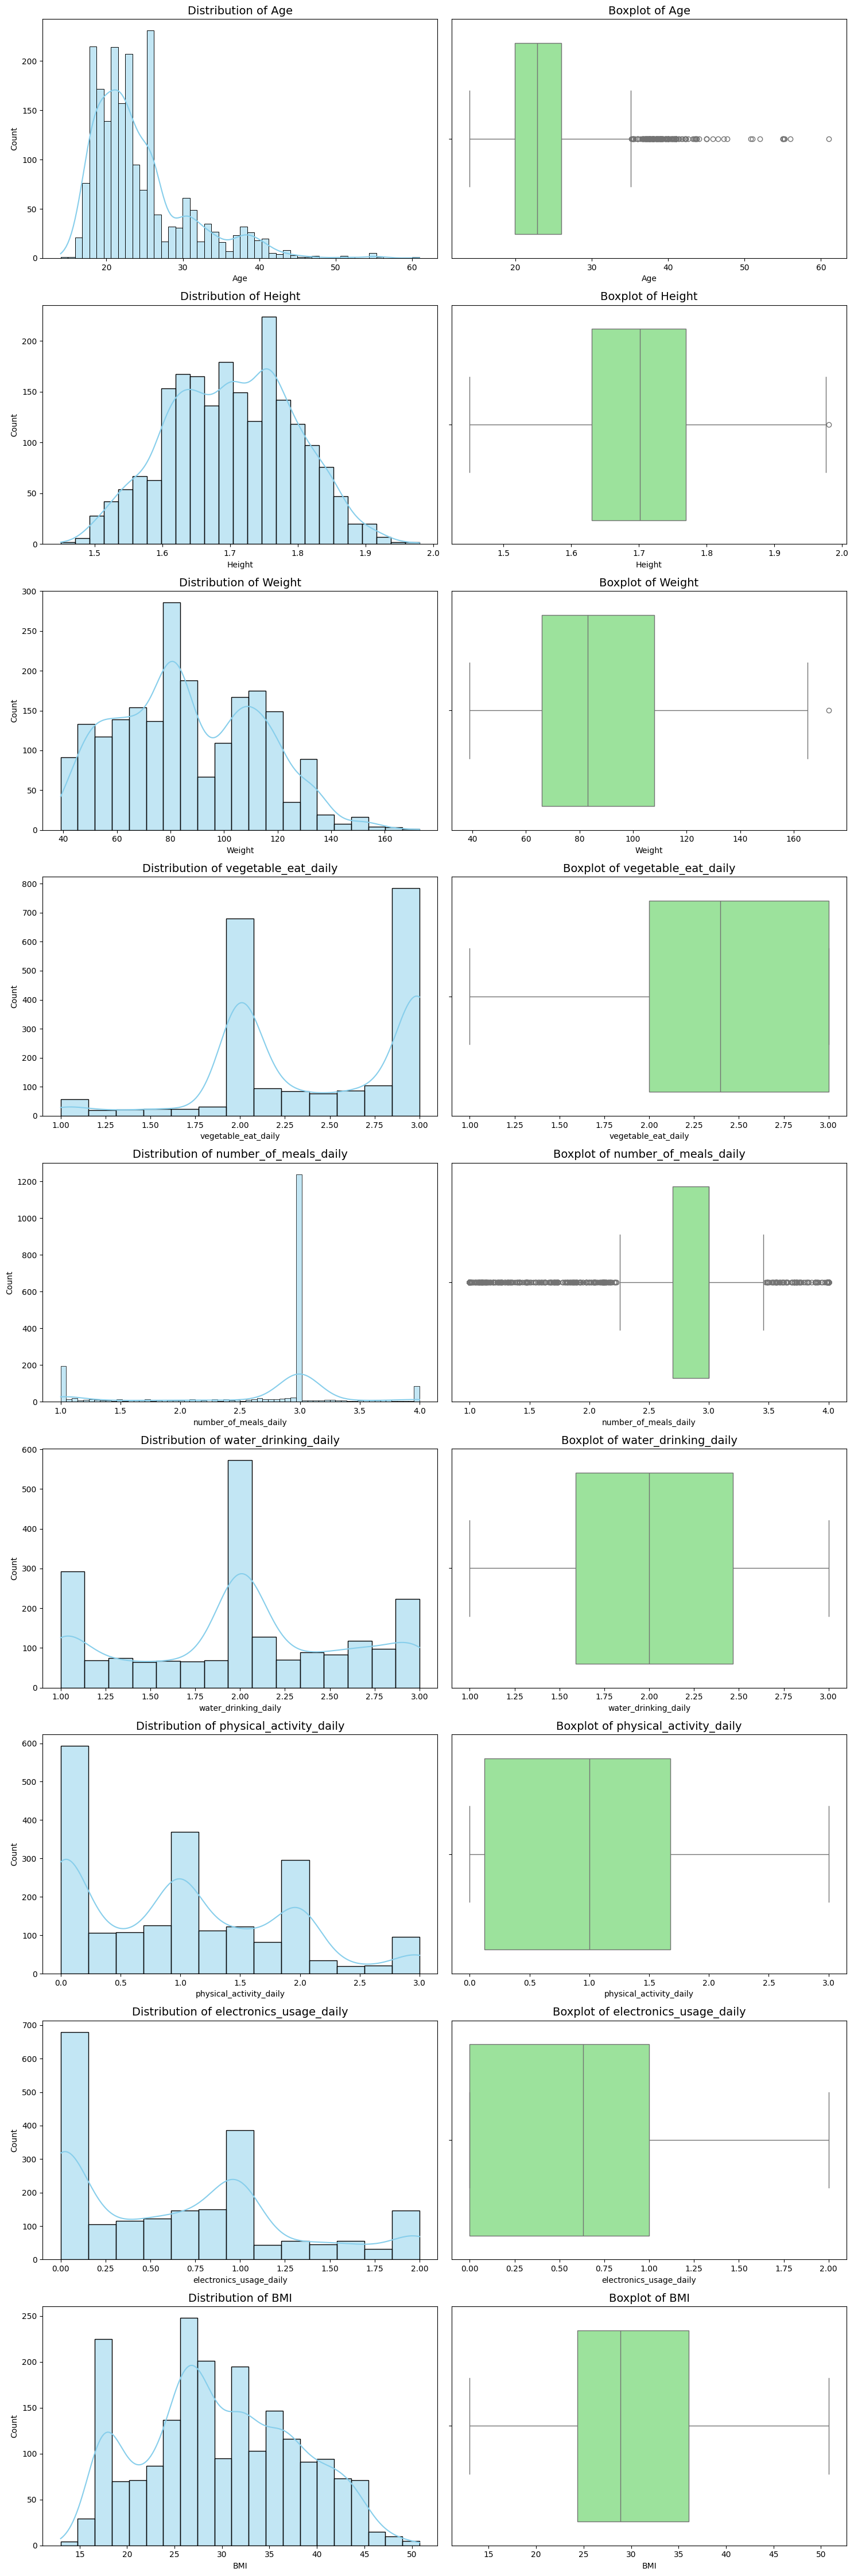

In [72]:
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure size based on the number of numerical variables
plt.figure(figsize=(15, len(numerical_cols) * 5))

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    # Distribution plot (Histogram + KDE)
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)
    sns.histplot(obesity[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    
    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2 * i + 2)
    sns.boxplot(x=obesity[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Age has many outliers. It may be worth to cap it down to 99th percentile. 

16.611521826904003
43.592034403088


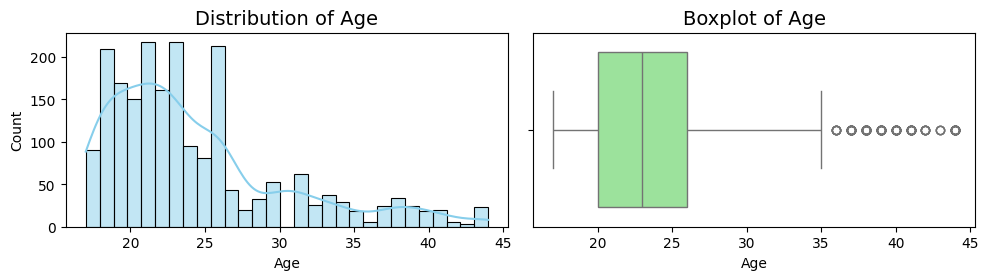

In [80]:
# Cap the Age variable to its 1st and 99th percentiles
lower_bound = obesity['Age'].quantile(0.01)
upper_bound = obesity['Age'].quantile(0.99)
print(lower_bound)
print(upper_bound)
# Apply the caps
obesity['Age'] = obesity['Age'].clip(lower=lower_bound, upper=upper_bound)
col = 'Age'
obesity[col] = obesity[col].round() 
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(obesity[col], kde=True, color='skyblue')
plt.title(f'Distribution of {col}', fontsize=14)
plt.subplot(2, 2, 2)
sns.boxplot(x=obesity[col], color='lightgreen')
plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

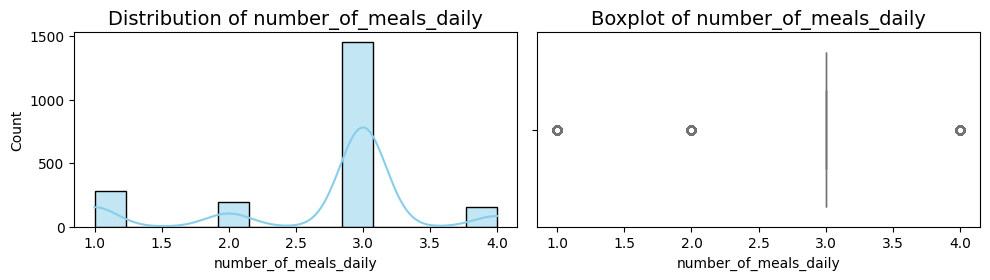

In [78]:
# number of meals has many fractional values, rounding to near 0.5 unit 
col = 'number_of_meals_daily'
obesity[col] = obesity[col].round() 
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(obesity[col], kde=True, color='skyblue')
plt.title(f'Distribution of {col}', fontsize=14)
plt.subplot(2, 2, 2)
sns.boxplot(x=obesity[col], color='lightgreen')
plt.title(f'Boxplot of {col}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

**Analysis of Distribution**
Vegetable: most people are eating between 2-3 vegetables daily
Number of Meals: most people eating around 3 meals daily
Water: Most people are drinking between 1.5 and 2.5 L water daily
Electronic Usage: Most people are saying they use between 0 - 1 hours of electronic
Physical activity: Most people are engaging in physical activity 0 - 1.5 days (assume weekly)


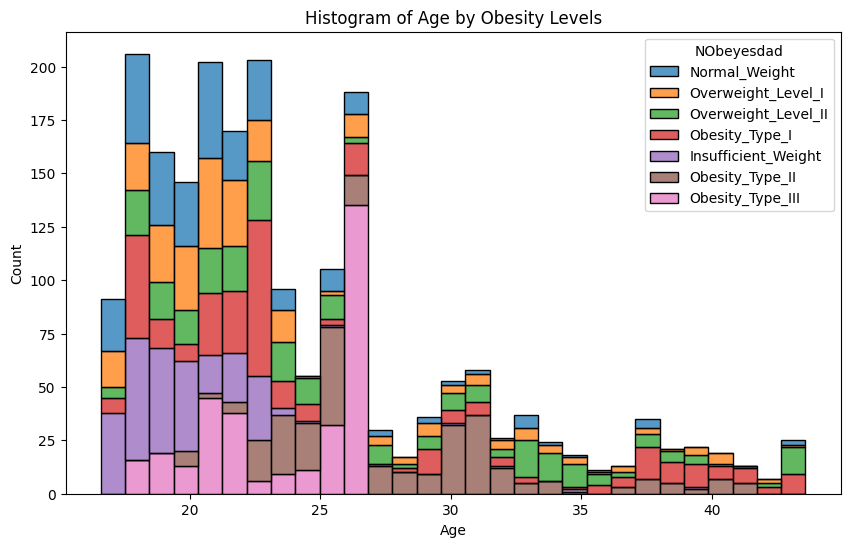

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=obesity, x='Age', hue='NObeyesdad', multiple='stack', kde=False)

# Add labels and title for histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Obesity Levels')
plt.show()

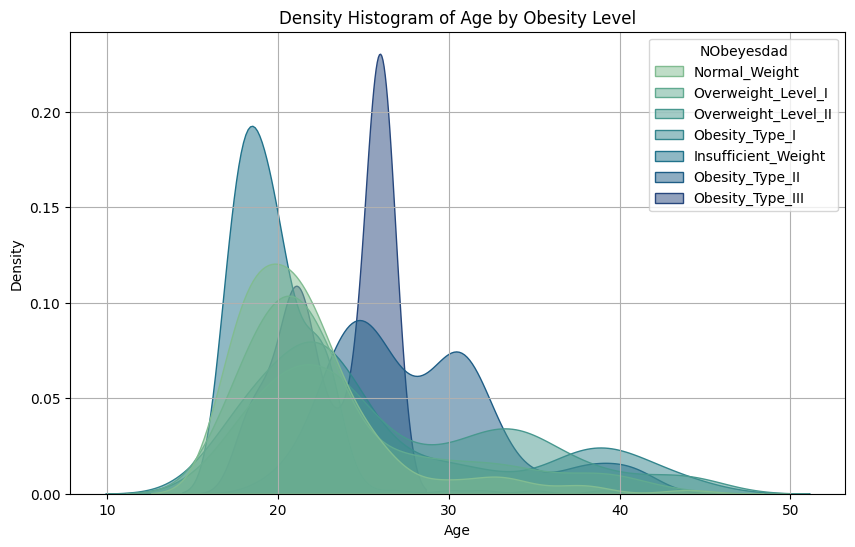

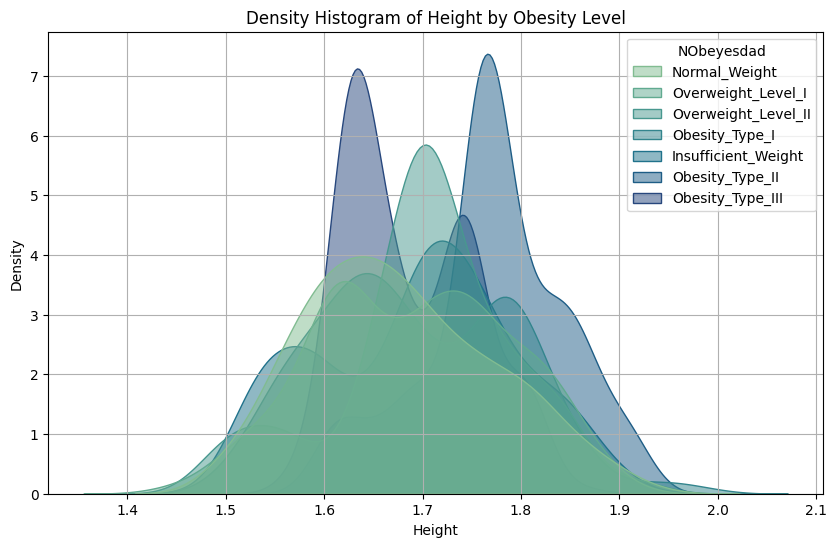

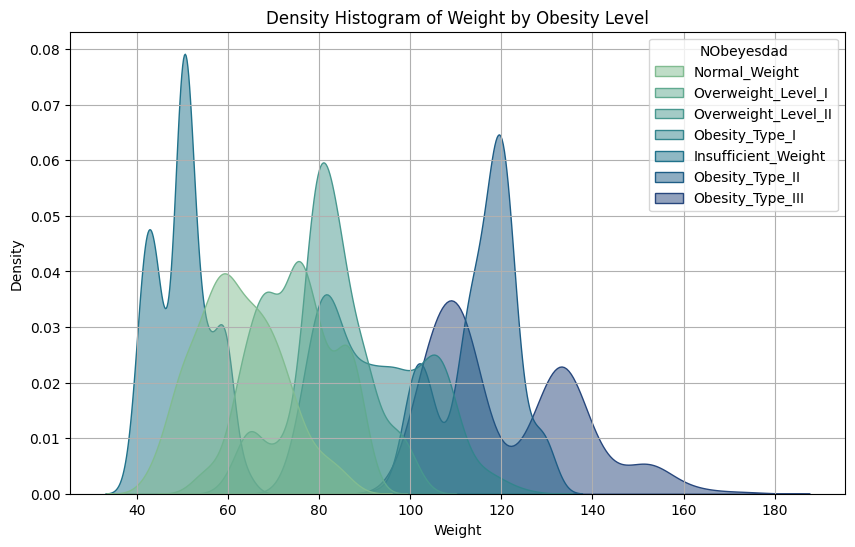

/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_62891/988716294.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)


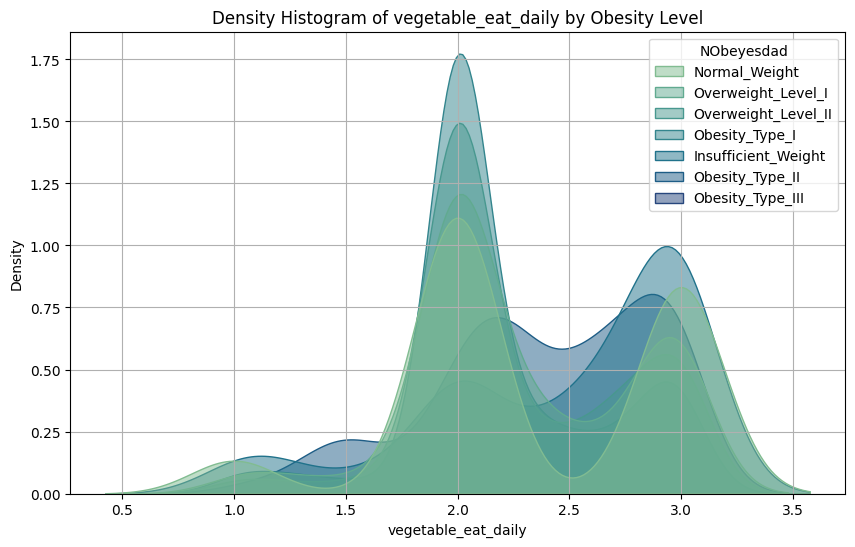

/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_62891/988716294.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)


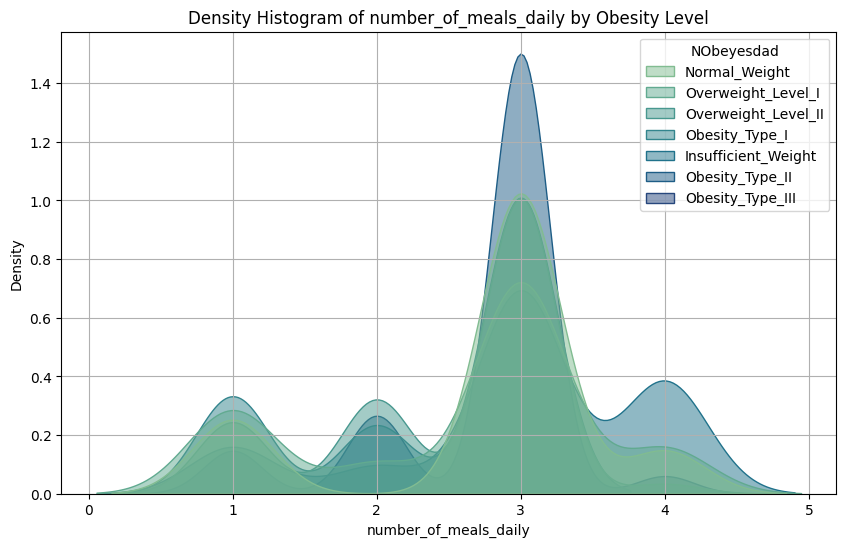

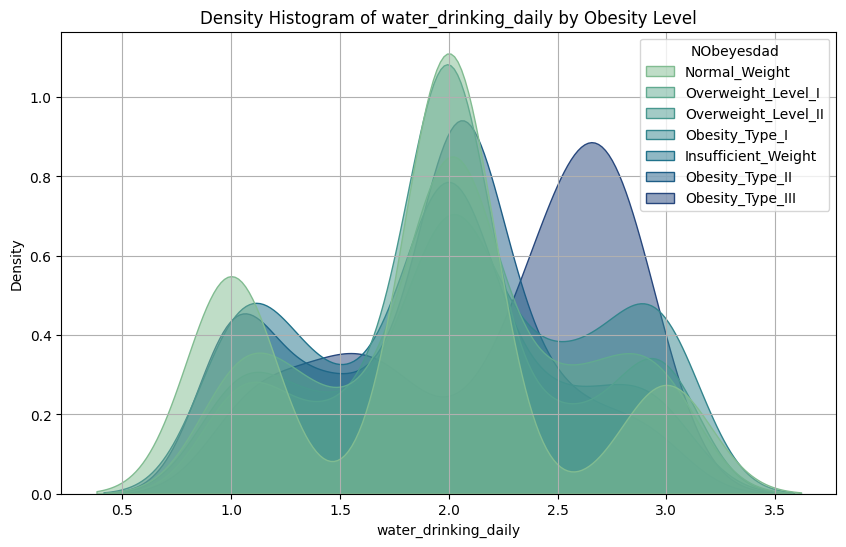

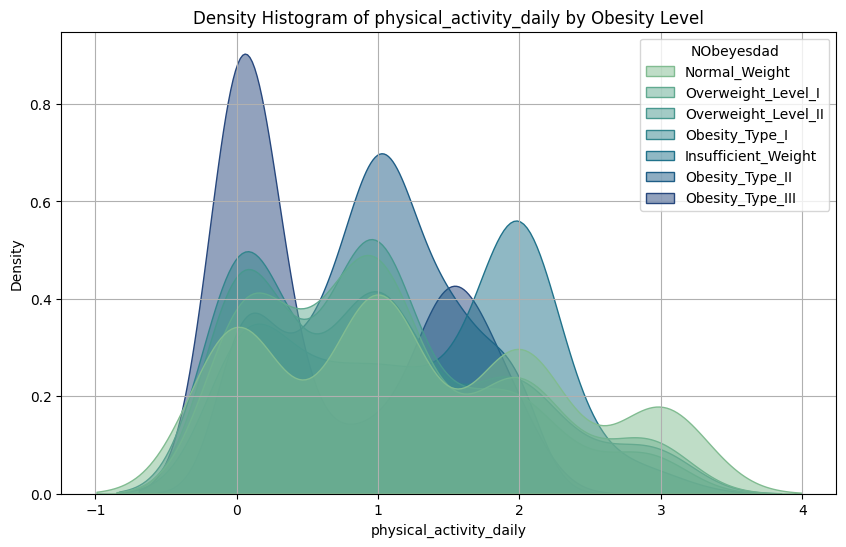

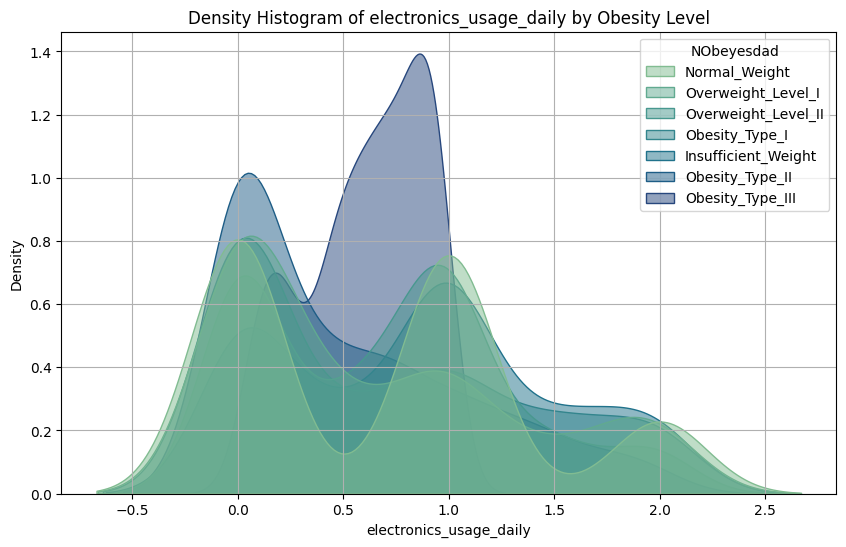

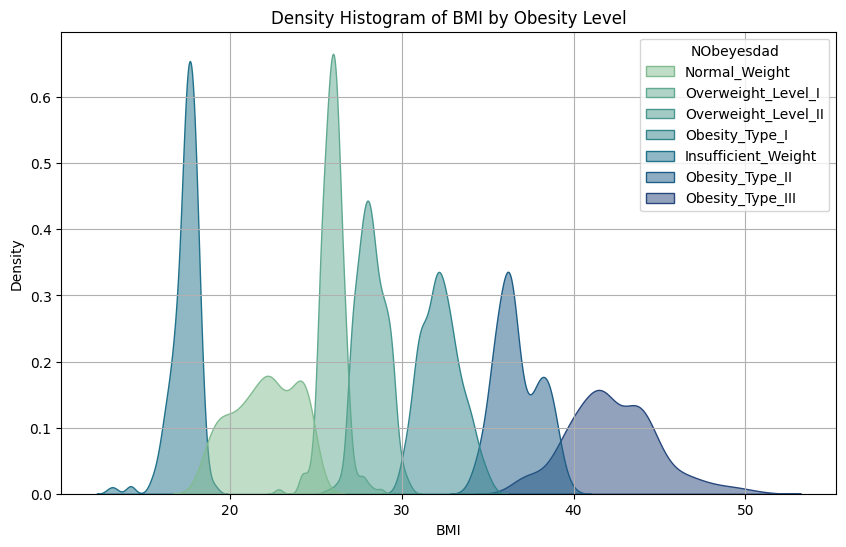

In [87]:
# Create density plots
# List of numerical variables to loop through
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical variable and create density plots
for var in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)
    plt.title(f'Density Histogram of {var} by Obesity Level')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



### Understanding relationship between family history and obesity level

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency


# Set pandas display options for wider output
pd.set_option('display.width', 1000)  # Adjust as needed
pd.set_option('display.max_columns', None)  # Show all columns

# Combine obesity categories into 'Combined_Obesity'
obesity['NObeyesdad_combined'] = obesity['NObeyesdad'].replace({
    'Obesity_Type_I': 'Combined_Obesity',
    'Obesity_Type_II': 'Combined_Obesity',
    'Obesity_Type_III': 'Combined_Obesity'
})

# Create a contingency table
contingency_table = pd.crosstab(obesity['family_history_with_overweight'], obesity['NObeyesdad_combined'])
print(contingency_table)


# Perform Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}, p-value: {p.round(11)}")


NObeyesdad_combined             Combined_Obesity  Insufficient_Weight  Normal_Weight  Overweight_Level_I  Overweight_Level_II
family_history_with_overweight                                                                                               
no                                             8                  142            130                  67                   18
yes                                          964                  125            152                 209                  272
Chi-squared statistic: 617.1765375524251, p-value: 0.0


The table and chi-square p-value ~ 0.0 indicate there is strong evidence to reject the null hypothesis, suggesting that there is a significant association between family_history_with_overweight and NObesity (obesity levels).

**Check assosiation between lifestyle factors and obesity**